For this exercise, I analyzed the Adult Income Dataset, which contains demographic and employment data for over 45,000 individuals.

The goal was to explore:

What factors are associated with earning more than $50K?

How education, marital status, work hours, and gender relate to income levels.

Presenting to a non-technical audience.

1. What factors seem associated with higher income?
2. Does education level influence income?
3. How does marital status affect income?
4. Is there any relationship between hours worked per week and income?
5. Are there differences across genders regarding income?

In [36]:
# Data Cleaning 

### Craft a Story from Adult Income Dataset
# Audience: Non-Technical

# 1. Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Set style
sns.set(style="whitegrid")


In [38]:

# 2. Load dataset
file_path = 'C:/Users/vidus/OneDrive/Documents/SpringBoard/StoryTellingExercise/AdultIncomDataset/adult.csv'

df = pd.read_csv(file_path)

# Quick look at data
df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [40]:
# 3. Data Cleaning & Preparation

# Check for missing values
df.isnull().sum()

# In this dataset, missing values are often marked as '?'
(df == '?').sum()

# Replace '?' with NaN to handle missing data
df.replace('?', pd.NA, inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)

# Reset index after dropping rows
df.reset_index(drop=True, inplace=True)

# Confirm cleanup
df.info()

# Simplify column names if necessary
#df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]
df.columns = [col.strip().lower().replace(" ", "_").replace("-", "_") for col in df.columns]


# Convert income to binary label
df['income'] = df['income'].apply(lambda x: 1 if '>50K' in x else 0)

# Quick check after cleaning
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.2+ MB


,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0


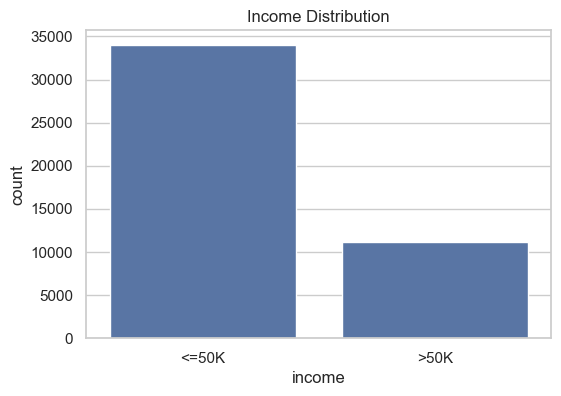

In [42]:
# 4. Exploratory Data Analysis (EDA) and Visualizations

# Question 1: Income Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='income', data=df)
plt.xticks([0,1], ['<=50K', '>50K'])
plt.title('Income Distribution')
plt.show()


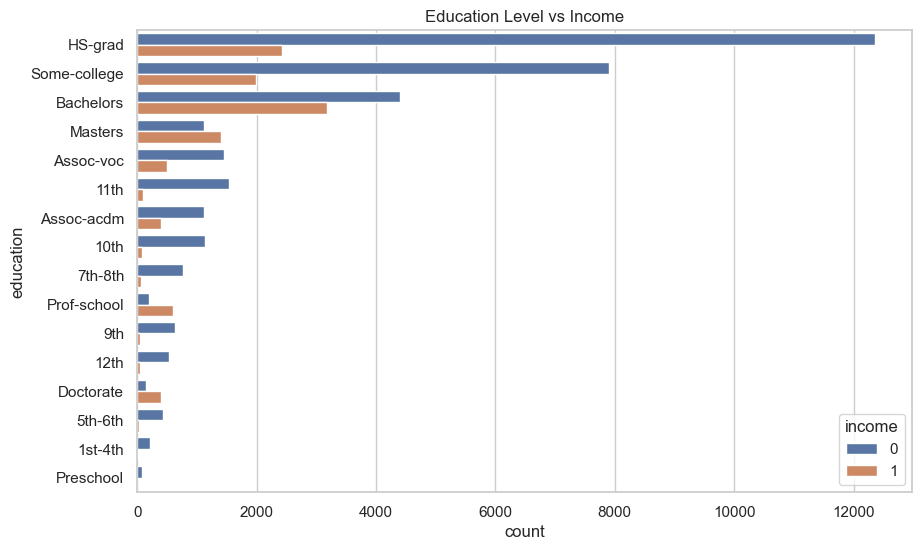

In [44]:

# Question 2: Education vs Income
plt.figure(figsize=(10,6))
sns.countplot(y='education', hue='income', data=df, order=df['education'].value_counts().index)
plt.title('Education Level vs Income')
plt.show()


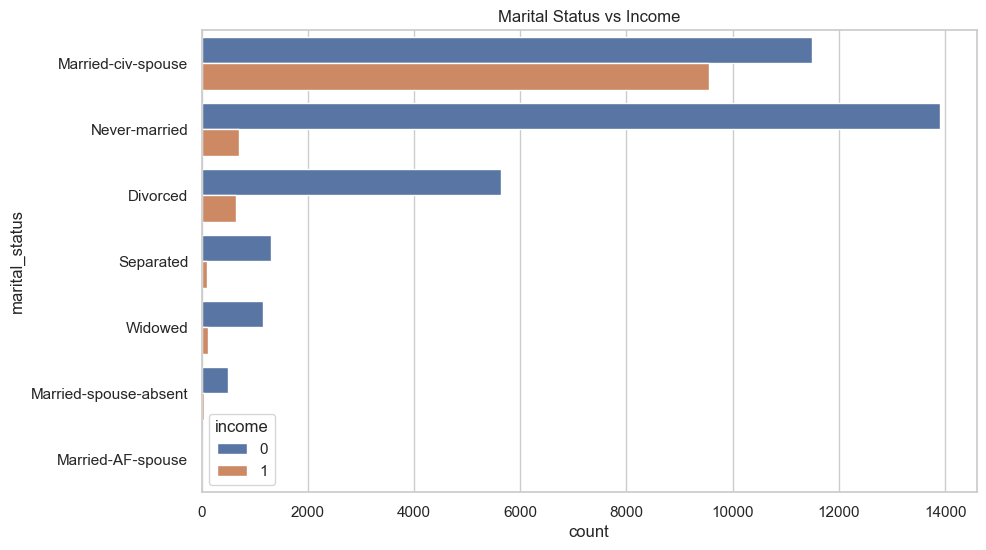

In [46]:

# Question 3: Marital Status vs Income
plt.figure(figsize=(10,6))
sns.countplot(y='marital_status', hue='income', data=df, order=df['marital_status'].value_counts().index)
plt.title('Marital Status vs Income')
plt.show()


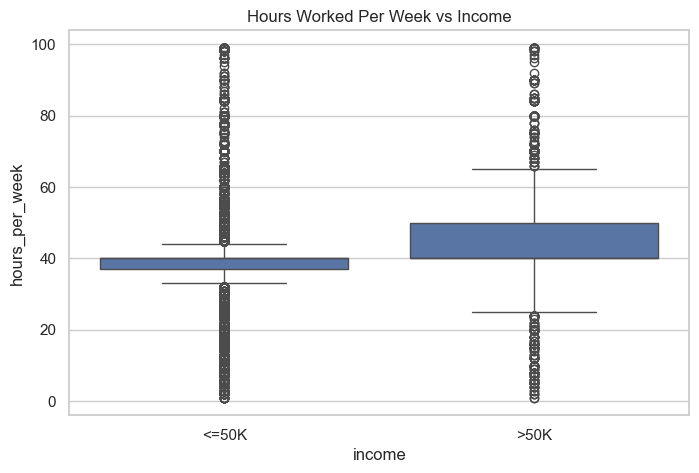

In [48]:

# Question 4: Hours per Week vs Income
plt.figure(figsize=(8,5))
sns.boxplot(x='income', y='hours_per_week', data=df)
plt.xticks([0,1], ['<=50K', '>50K'])
plt.title('Hours Worked Per Week vs Income')
plt.show()


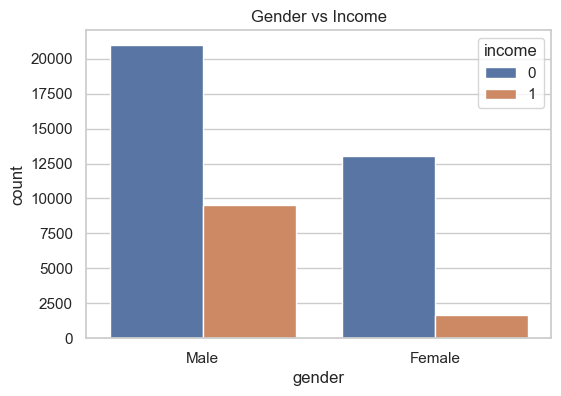

In [56]:

# Question 5: Gender vs Income
plt.figure(figsize=(6,4))
sns.countplot(x='gender', hue='income', data=df)

plt.title('Gender vs Income')
plt.show()


Conclusion & Insights Summary

1. Income Distribution:

The majority of individuals earn an annual income of $50,000 or less.

Not many people earn more than $50,000, indicating income inequality.

2. Education vs Income:
   
Higher education levels (Bachelors, Masters, Doctorate) are strongly correlated with earning more than 50K.

Most individuals with less than high school education remain in the less than or equal to $50,000 category.

3. Marital Status vs Income:
   
Married individuals (especially "Married-civ-spouse") are more likely to be in the greater than $50,000 income group.

Individuals who are "Never-married", "Divorced", or "Separated" are more often in the less than or equal to $50,000 group.

4. Hours Worked Per Week vs Income:
People earning greater than $50,000 generally work more hours per week.

However, even among high earners, there's variation — some people still earn more with moderate work hours, possibly due to skill, experience, or role type.

5. Gender vs Income:
Males dominate the greater than 50K earning group significantly.

Females have a much smaller representation in the high-income category — indicating a potential gender income gap.

Income tends to increase with higher education, stable marital status, longer work hours, and being male.

These factors reflect how demographic and work-life variables contribute to income disparity.

